In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc,classification_report,precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df['gender'].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [6]:
df = df.drop(df[df['gender'] == 'Other'].index)

In [7]:
df.shape

(99982, 9)

In [8]:
df['gender_encoded'] = np.where(df['gender'] == 'Female', 1, 0)
df.drop(columns=['gender'], inplace=True)
df['gender_encoded'].value_counts()

,count
gender_encoded,
1,58552
0,41430


In [9]:
df['smoking_history'].value_counts()

,count
smoking_history,
No Info,35810
never,35092
former,9352
current,9286
not current,6439
ever,4003


In [10]:
label_encoder = LabelEncoder()
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])
df.drop(columns=['smoking_history'], inplace=True)
df['smoking_history_encoded'].value_counts()
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,80.0,0,1,25.19,6.6,140,0,1,4
1,54.0,0,0,27.32,6.6,80,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,4
3,36.0,0,0,23.45,5.0,155,0,1,1
4,76.0,1,1,20.14,4.8,155,0,0,1


In [12]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_encoded',
       'smoking_history_encoded'],
      dtype='object')

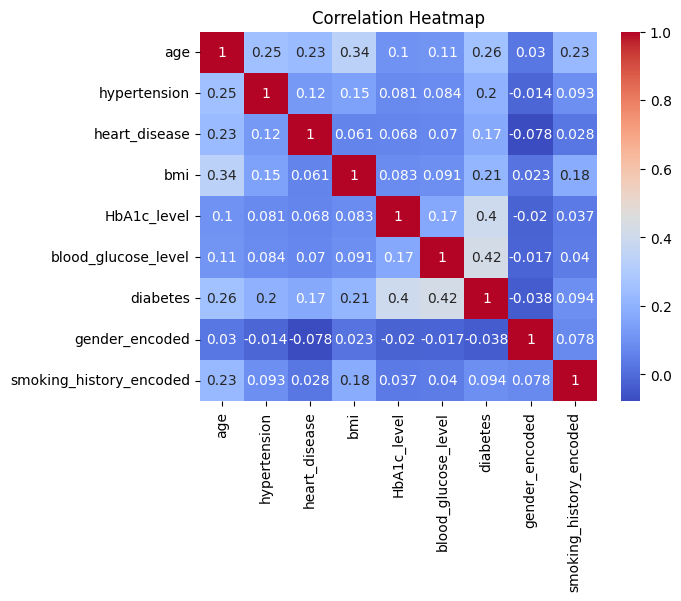

In [11]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
X = df.drop(columns=['diabetes'], axis=1)
y = df['diabetes']

In [ ]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_encoded,smoking_history_encoded
0,80.0,0,1,25.19,6.6,140,1,4
1,54.0,0,0,27.32,6.6,80,1,0
2,28.0,0,0,27.32,5.7,158,0,4
3,36.0,0,0,23.45,5.0,155,1,1
4,76.0,1,1,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,1,0
99996,2.0,0,0,17.37,6.5,100,1,0
99997,66.0,0,0,27.83,5.7,155,0,3
99998,24.0,0,0,35.42,4.0,100,1,4


In [ ]:
y

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=6000, solver='saga')

In [16]:
df.shape

(99982, 9)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=6000, solver='saga')

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9583937590638596
F1 Score: 0.9544199359039015
Precision: 0.9566552095363122
Recall: 0.9583937590638596


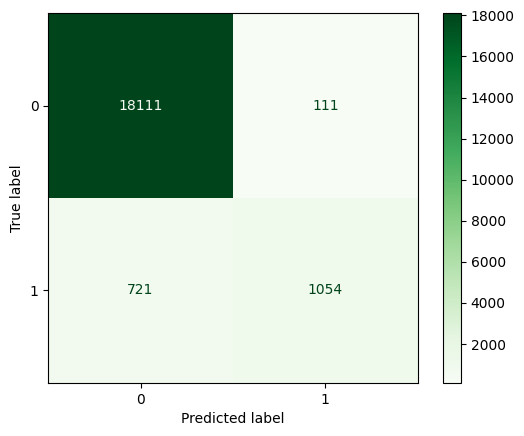

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.show()

In [21]:
report = classification_report(y_test, y_pred)
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
report_df

,precision,recall,f1-score,support
0,0.961714,0.993908,0.977546,18222.000000
1,0.904721,0.593803,0.717007,1775.000000
accuracy,0.958394,0.958394,0.958394,0.958394
macro avg,0.933218,0.793856,0.847277,19997.000000
weighted avg,0.956655,0.958394,0.954420,19997.000000


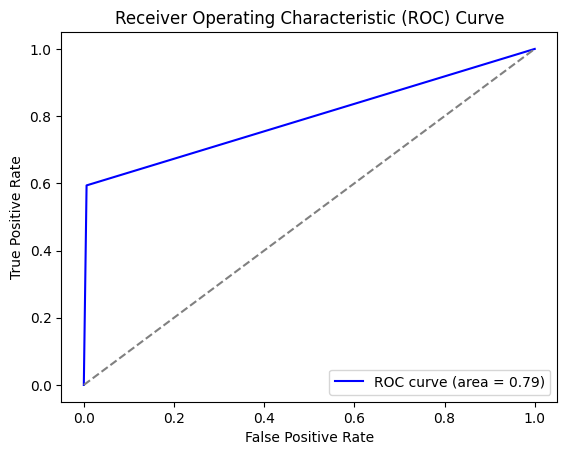

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

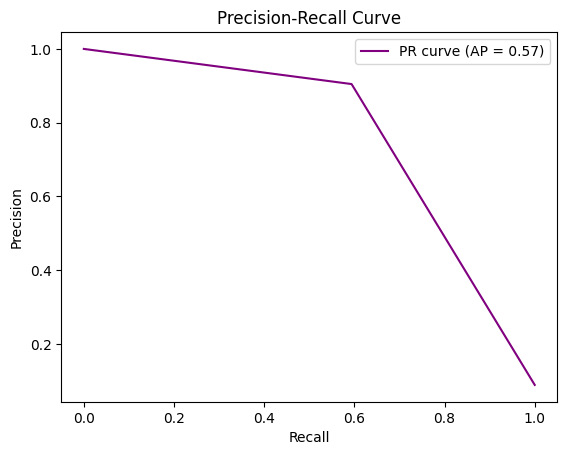

In [23]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

plt.plot(recall, precision, color='purple', label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=3, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy Score:", np.mean(scores))

Cross-Validation Accuracy Scores: [0.9600036  0.95925226 0.95943229]
Mean Cross-Validation Accuracy Score: 0.9595627168802014


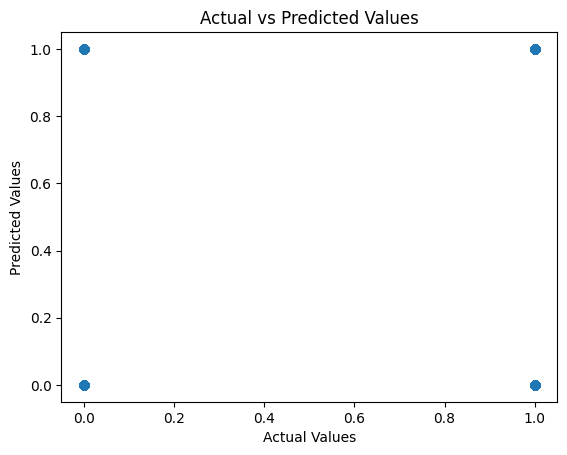

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [ ]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_encoded',
       'smoking_history_encoded'],
      dtype='object')

In [ ]:
input_data1 = {
    'age': 45,                     # Age of the individual
    'hypertension': 1,             # 1 if the individual has hypertension, 0 otherwise
    'heart_disease': 0,            # 1 if the individual has heart disease, 0 otherwise
    'bmi': 27.5,                   # Body Mass Index (BMI)
    'HbA1c_level': 6.1,            # HbA1c level, a measure of blood sugar control over time
    'blood_glucose_level': 130,    # Current blood glucose level (mg/dL)
    'gender_encoded': 0,           # Encoded gender, e.g., 0 for male, 1 for female
    'smoking_history_encoded': 2   # Encoded smoking history (e.g., 0 = never, 1 = former, 2 = current smoker)
}

input_data2 = {
    'age': 50,                     # Age of the individual
    'hypertension': 1,             # 1 if the individual has hypertension, 0 otherwise
    'heart_disease': 0,            # 1 if the individual has heart disease, 0 otherwise
    'bmi': 30.2,                   # Body Mass Index (BMI)
    'HbA1c_level': 8.0,            # HbA1c level, a measure of blood sugar control over time
    'blood_glucose_level': 180,    # Current blood glucose level (mg/dL)
    'gender_encoded': 1,           # Encoded gender, e.g., 0 for male, 1 for female
    'smoking_history_encoded': 1   # Encoded smoking history (e.g., 0 = never, 1 = former, 2 = current smoker)
}


# Convert dictionary to DataFrame
input_data_as_dataframe1 = pd.DataFrame([input_data1])
input_data_as_dataframe2 = pd.DataFrame([input_data2])



# Make prediction
prediction1 = model.predict(input_data_as_dataframe1)
prediction2 = model.predict(input_data_as_dataframe2)

# Print result based on prediction
if prediction1[0] == 0:
    print('The Person1 is not a diabetic patient')
else:
    print('The Person1 is a diabetic patient')

if prediction2[0] == 0:
    print('The Person2 is not a diabetic patient')
else:
    print('The Person2 is a diabetic patient')


The Person1 is not a diabetic patient
The Person2 is a diabetic patient
